In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Read dataset
dataset = pd.read_csv('./IoT_Weather.csv')
dataset

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035000,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035000,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035000,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035000,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...,...,...
650237,27-Apr-19,12:41:17,40.384291,9.049059,93.094490,0,normal
650238,27-Apr-19,12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,27-Apr-19,12:41:18,23.540606,0.913648,30.478316,0,normal
650240,27-Apr-19,12:41:18,46.016150,3.493588,73.328413,0,normal


In [3]:
dataset = dataset.drop('date', axis=1)
dataset = dataset.drop('time', axis=1)
dataset

,temperature,pressure,humidity,label,type
0,31.788508,1.035000,32.036579,0,normal
1,41.630997,1.035000,30.886165,0,normal
2,42.256959,1.035000,19.755908,0,normal
3,49.116581,1.035000,78.949621,0,normal
4,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...
650237,40.384291,9.049059,93.094490,0,normal
650238,47.240113,-5.782022,28.146511,0,normal
650239,23.540606,0.913648,30.478316,0,normal
650240,46.016150,3.493588,73.328413,0,normal


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  650242 non-null  float64
 1   pressure     650242 non-null  float64
 2   humidity     650242 non-null  float64
 3   label        650242 non-null  int64  
 4   type         650242 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 24.8+ MB


In [5]:
dataset['label'].value_counts()

label
0    559718
1     90524
Name: count, dtype: int64

In [6]:
dataset['type'].value_counts()

type
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

<Axes: title={'center': 'Labels Distribution'}>

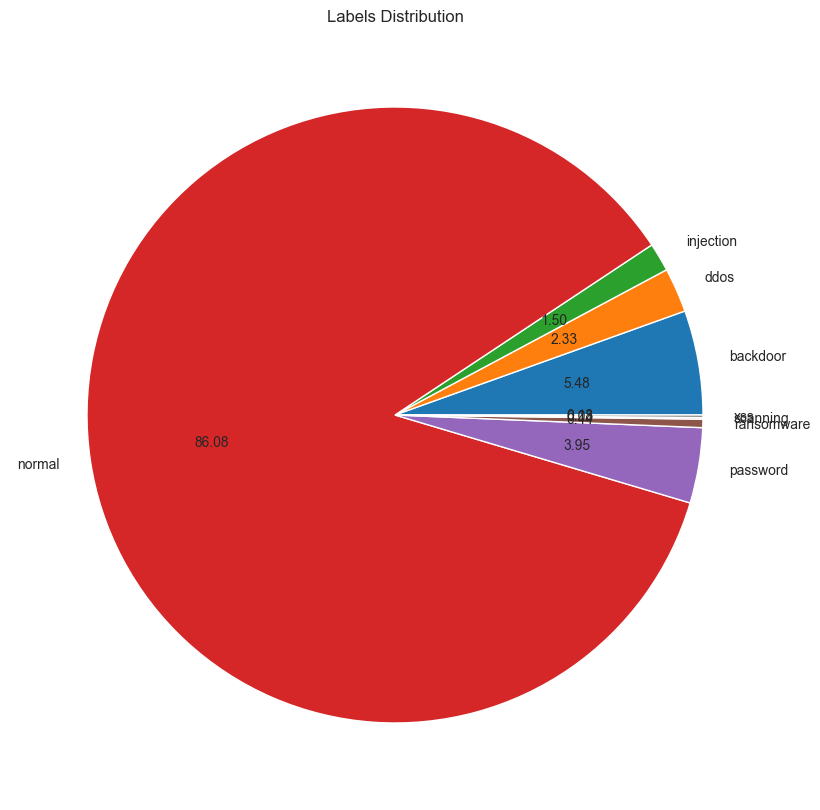

In [7]:
plt.title("Labels Distribution")
dataset.groupby('type').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [8]:
mapping = {'normal': 0, 'backdoor': 1, 'password': 2, 'ddos': 3, 'injection': 4, 'ransomware': 5, 'xss': 6, 'scanning': 7}
dataset['type'] = dataset['type'].replace(mapping)
dataset = dataset.drop('label', axis=1)
dataset

,temperature,pressure,humidity,type
0,31.788508,1.035000,32.036579,0
1,41.630997,1.035000,30.886165,0
2,42.256959,1.035000,19.755908,0
3,49.116581,1.035000,78.949621,0
4,24.017085,1.035000,40.001059,0
...,...,...,...,...
650237,40.384291,9.049059,93.094490,0
650238,47.240113,-5.782022,28.146511,0
650239,23.540606,0.913648,30.478316,0
650240,46.016150,3.493588,73.328413,0


In [9]:
dataset['type'].value_counts()

type
0    559718
1     35641
2     25715
3     15182
4      9726
5      2865
6       866
7       529
Name: count, dtype: int64

In [10]:
shuffled = dataset.sample(frac=1, random_state=42)
shuffled

,temperature,pressure,humidity,type
622000,33.536841,2.445220,98.890397,0
218767,37.357283,1.142129,77.398136,0
331426,47.070575,22.051750,95.216292,0
218657,37.068443,1.108547,14.599590,0
164213,42.614987,0.338316,13.068626,0
...,...,...,...,...
644167,38.080708,7.904917,93.129738,0
259178,38.337280,-3.591095,23.764368,0
365838,28.144433,-24.141550,97.271074,0
131932,28.094250,1.846259,34.707421,0


In [11]:
X = dataset.drop('type', axis=1)
y = dataset['type']
X,y

(        temperature  pressure   humidity
 0         31.788508  1.035000  32.036579
 1         41.630997  1.035000  30.886165
 2         42.256959  1.035000  19.755908
 3         49.116581  1.035000  78.949621
 4         24.017085  1.035000  40.001059
 ...             ...       ...        ...
 650237    40.384291  9.049059  93.094490
 650238    47.240113 -5.782022  28.146511
 650239    23.540606  0.913648  30.478316
 650240    46.016150  3.493588  73.328413
 650241    48.082975  0.100271  20.949148
 
 [650242 rows x 3 columns],
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 650237    0
 650238    0
 650239    0
 650240    0
 650241    0
 Name: type, Length: 650242, dtype: int64)

In [12]:
X_global_train, X_global_test, y_global_train, y_global_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_global_train, X_global_test, y_global_train, y_global_test

(        temperature   pressure   humidity
 160320    43.657732   0.220264  38.755167
 160044    26.001551   2.245438  24.930933
 224131    48.326019   0.238395  26.184502
 125679    32.300958   0.369532  61.225823
 53956     36.221819  17.773252   3.614887
 ...             ...        ...        ...
 644167    38.080708   7.904917  93.129738
 259178    38.337280  -3.591095  23.764368
 365838    28.144433 -24.141550  97.271074
 131932    28.094250   1.846259  34.707421
 121958    23.680732   0.974118  65.134046
 
 [520193 rows x 3 columns],
         temperature   pressure   humidity
 622000    33.536841   2.445220  98.890397
 218767    37.357283   1.142129  77.398136
 331426    47.070575  22.051750  95.216292
 218657    37.068443   1.108547  14.599590
 164213    42.614987   0.338316  13.068626
 ...             ...        ...        ...
 282554    39.058987  18.015568  42.754155
 460125    42.815427  -4.452217  31.667375
 367254    22.156584  17.796978  79.512190
 264479    24.500890   4

In [13]:
#X_local1_train, X_local1_test, y_local1_train, y_local1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#X_local2_train, X_local2_test, y_local2_train, y_local2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#X_local3_train, X_local3_test, y_local3_train, y_local3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [14]:
#X_local1_train, X_local1_test, y_local1_train, y_local1_test